## Credit Card Fraud Detection

**Business Understanding**

Credit card companies must recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase. 

**Problem Statement**

The business problem they are facing is the high rate of false positives in their current system, which leads to unnecessary inconvenience for customers and additional workload for the fraud investigation team. 
The stakeholder's goal is to implement a more accurate and efficient fraud detection model that can reduce false positives without compromising on the detection of actual fraud cases.

## Import the relevant libraries and technologies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score


## Exploratory Data Analysis

**1. Load our data**

In [2]:
data = pd.read_csv('C:/Users/hp/Desktop/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.shape

(284807, 31)

In [4]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
data.info

<bound method DataFrame.info of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [9]:
LABELS = ["Normal", "Fraud"]

Text(0, 0.5, 'Frequency')

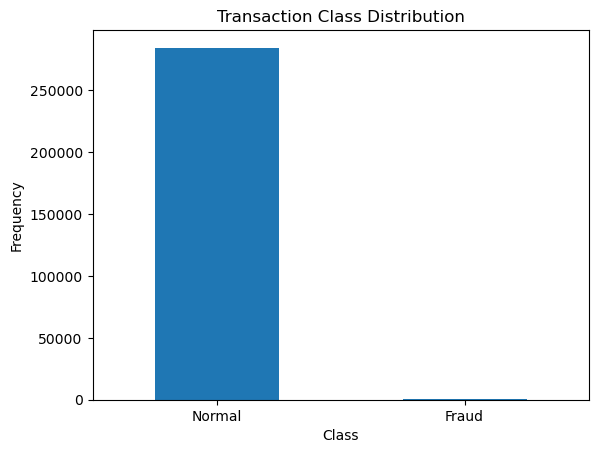

In [10]:
count_classes = pd.value_counts(data['Class'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")

plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

Only 492 of transaction are fraudulent.
The data is highly unbalanced with respect with target variable Class.

In [11]:
#Plotting time density for the Credit Card transaction dataset
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
Genuine_transaction = data.loc[data['Class'] == 0]["Time"]
fraud_transaction = data.loc[data['Class'] == 1]["Time"]
hist_data = [Genuine_transaction, fraud_transaction]
group_labels = ['Genuine transaction', 'Fraud transaction']

fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)
fig['layout'].update(title='Time Density Plot for Credit Card Transactions', xaxis=dict(title='Time [s]'))
iplot(fig, filename='dist_only')

c:\Users\hp\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


C:\Users\hp\AppData\Local\Temp\ipykernel_4800\1536538178.py:8: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\hp\AppData\Local\Temp\ipykernel_4800\1536538178.py:12: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




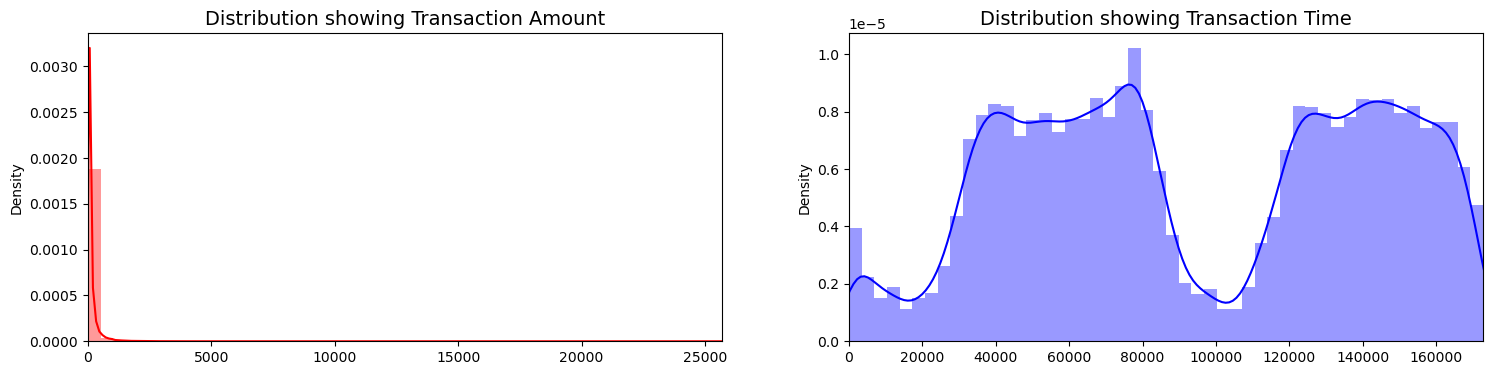

In [12]:
#Distribution of transaction Amount Vs Transaction time
import seaborn as sns
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = data['Amount'].values
time_val = data['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution showing Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution showing Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])



plt.show()

<Axes: title={'center': 'Correlated with Class'}>

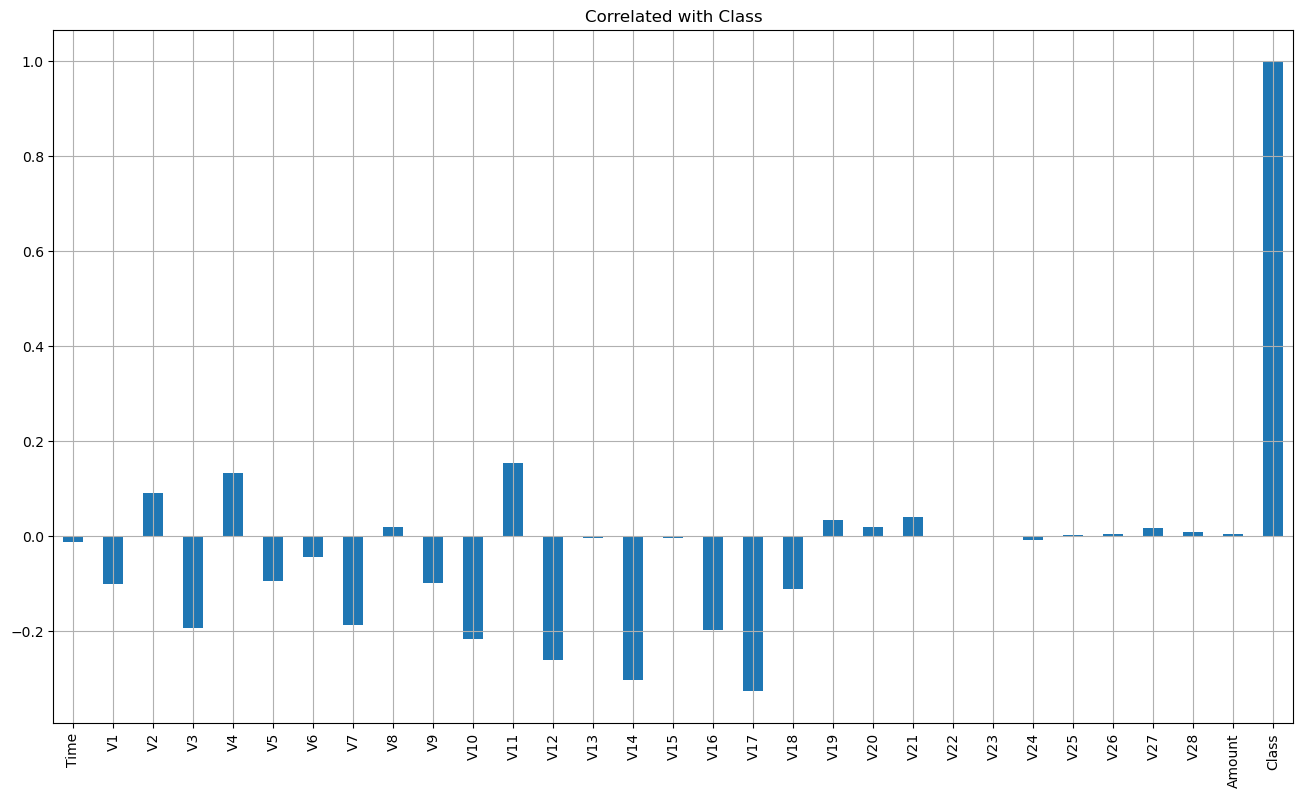

In [13]:
data.corrwith(data['Class']).plot.bar(
  figsize = (16, 9), title = 'Correlated with Class', grid = True
)

From the above visualization we can see which coloumn correlates highly wth the class column. In  this case V11. 

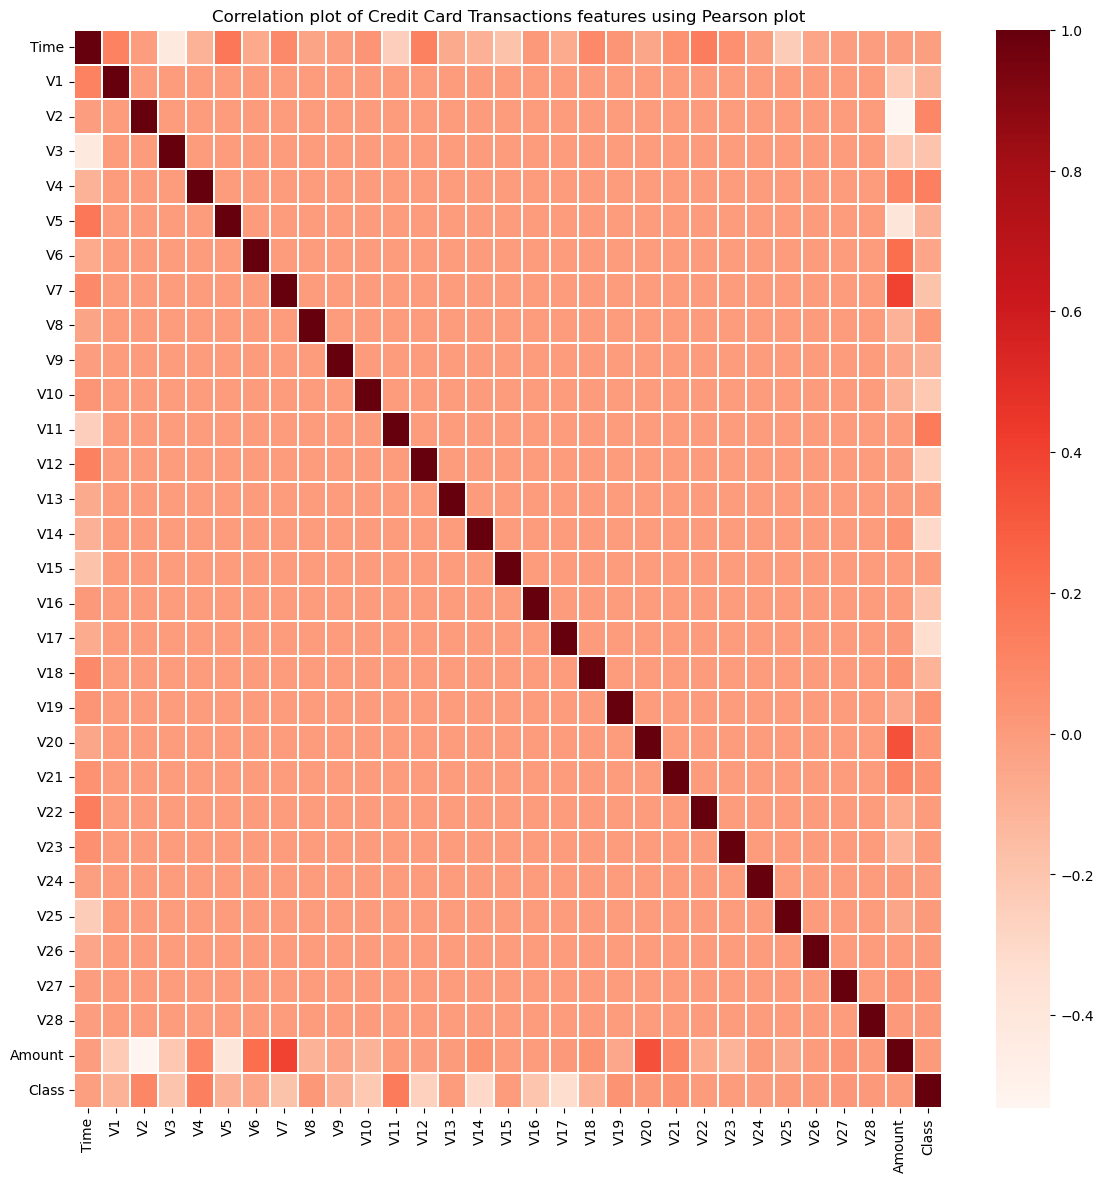

In [14]:
#Plotting correlation of Features
plt.figure(figsize = (14,14))
plt.title('Correlation plot of Credit Card Transactions features using Pearson plot')
corr = data.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")
plt.show()

As expected, there is no notable correlation between features V1-V28. There are certain correlations between some of these features and Time (inverse correlation with V3) and Amount (direct correlation with V7 and V20, inverse correlation with V1 and V5).

**Distribution of features by class**

C:\Users\hp\AppData\Local\Temp\ipykernel_4800\2860516133.py:15: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.


C:\Users\hp\AppData\Local\Temp\ipykernel_4800\2860516133.py:16: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.


C:\Users\hp\AppData\Local\Temp\ipykernel_4800\2860516133.py:15: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.


C:\Users\hp\AppData\Local\Temp\ipykernel_4800\2860516133.py:16: UserWarning:



The `bw` parameter is deprecated

<Figure size 640x480 with 0 Axes>

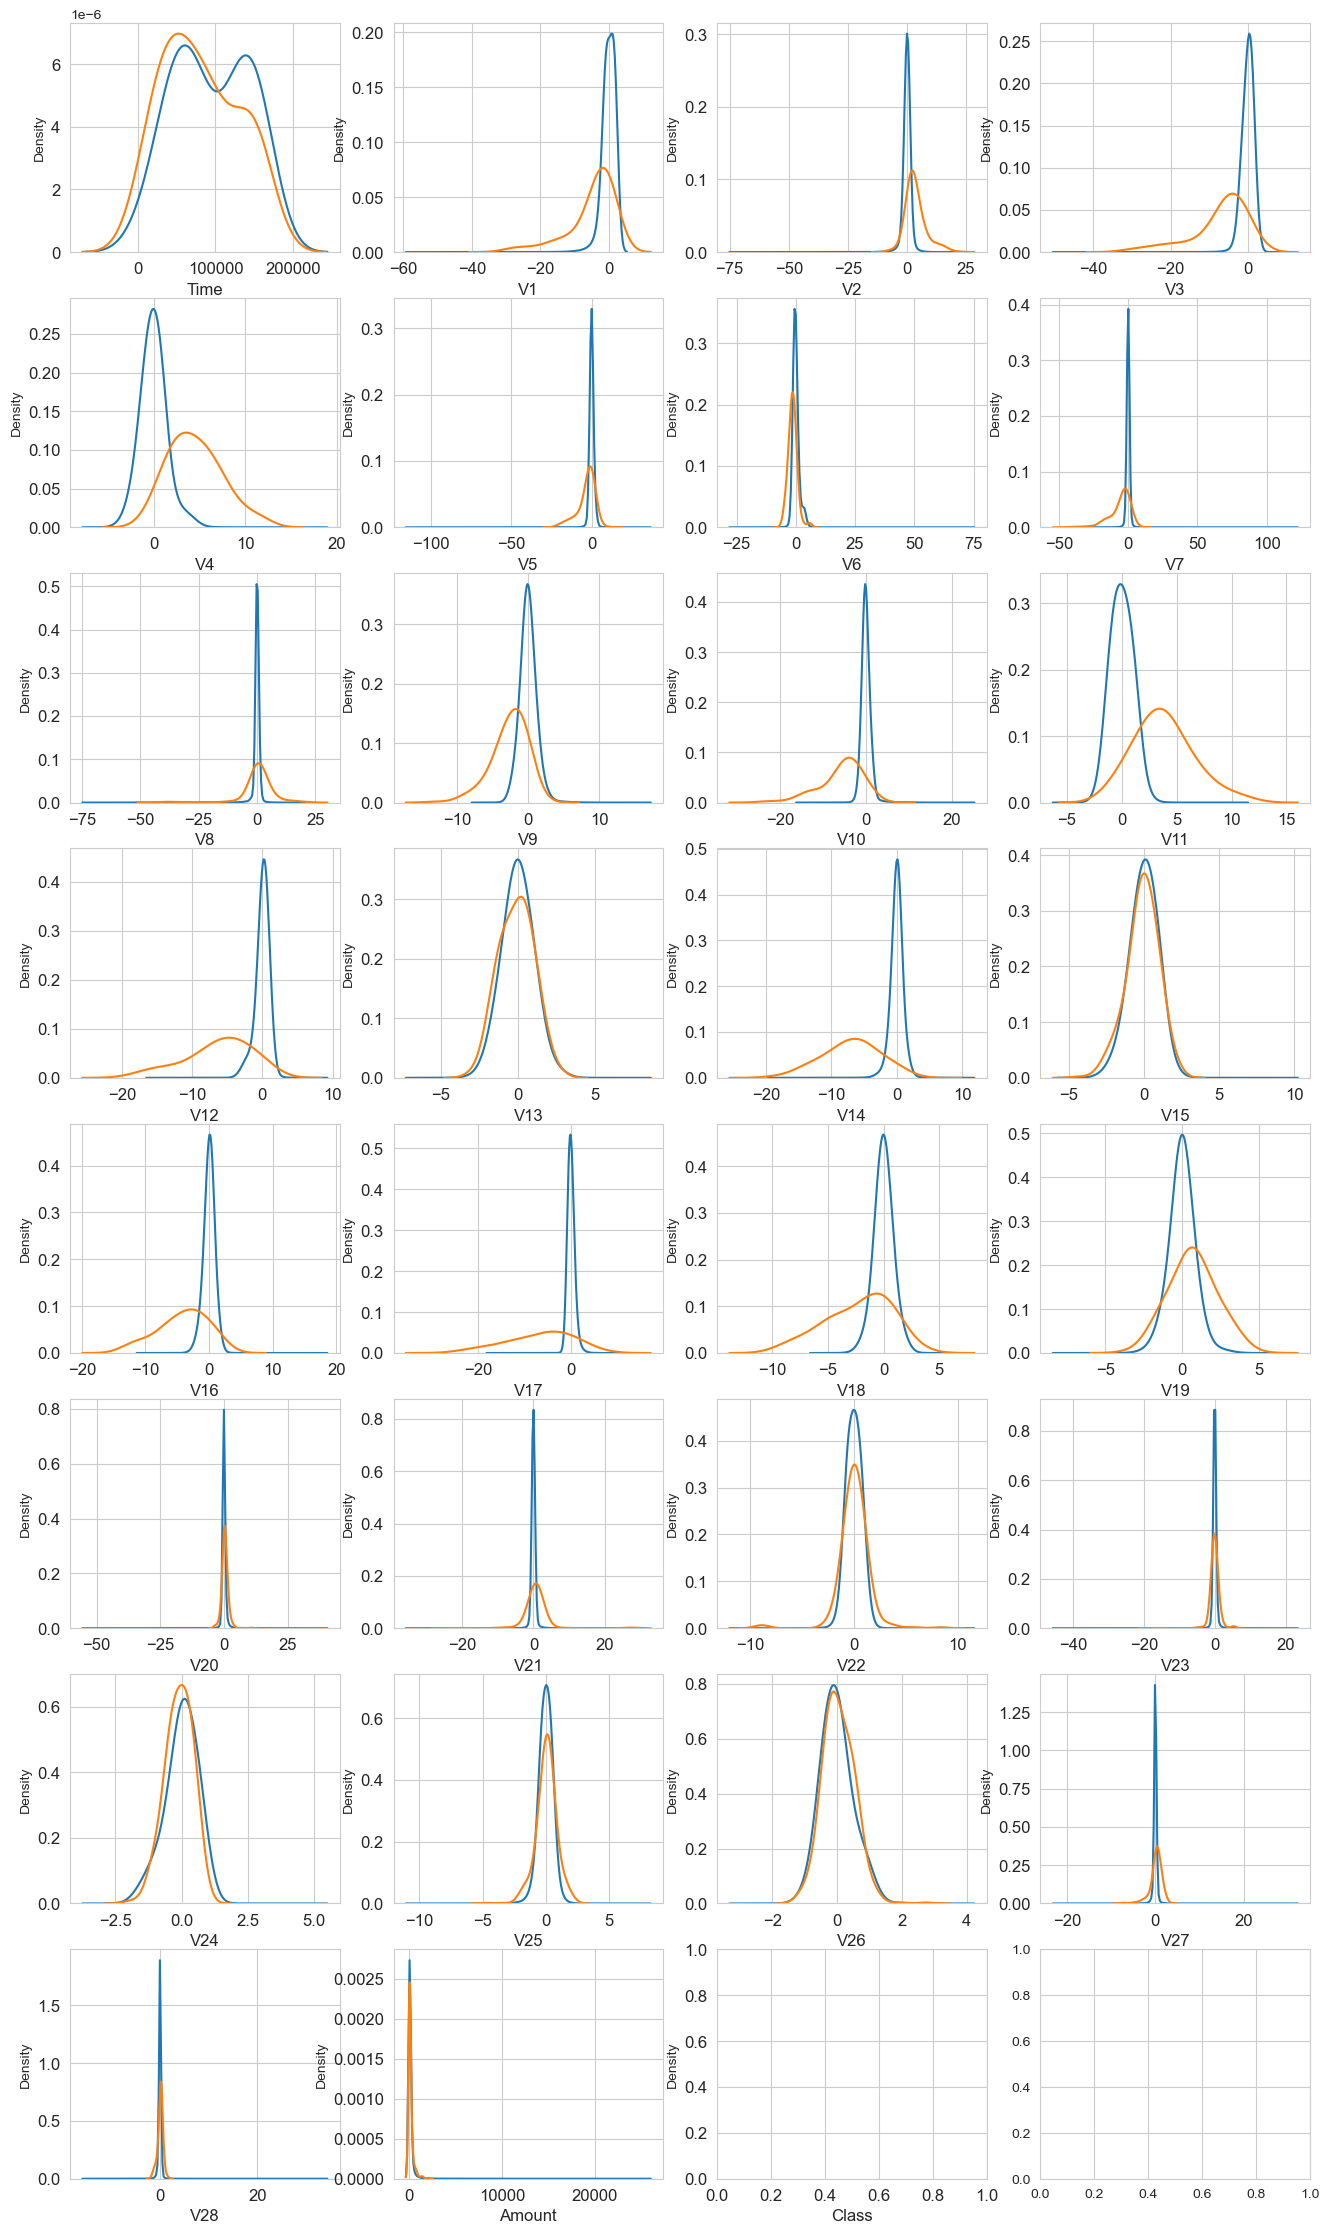

In [15]:
#Plotting feature density visualization
val = data.columns.values

i = 0
genuine = data.loc[data['Class'] == 0]
fraud = data.loc[data['Class'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in val:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(genuine[feature], bw=0.5,label="Class = 0")
    sns.kdeplot(fraud[feature], bw=0.5,label="Class = 1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();



For some of the features we can observe a good selectivity in terms of distribution for the two values of Class: V4, V11 have clearly separated distributions for Class values 0 and 1, V12, V14, V18 are partially separated, V1, V2, V3, V10 have a quite distinct profile, whilst V25, V26, V28 have similar profiles for the two values of Class.

In general, with just few exceptions (Time and Amount), the features distribution for legitimate transactions (values of Class = 0) is centered around 0, sometime with a long queue at one of the extremities. In the same time, the fraudulent transactions (values of Class = 1) have a skewed (asymmetric) distribution.


## Data Preprocessing
Here we determine our predictor and target variables. 

We split the data to train and test data.
 
Finally we scale our data. 

In [16]:
x = data.drop(columns = 'Class')
y = data['Class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [17]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [18]:
x_train

array([[-0.87750986, -0.57177938,  0.62828369, ...,  0.57377804,
        -0.2196612 , -0.30511629],
       [-1.15308534,  0.62679248, -0.08362249, ..., -0.17091545,
         0.00631402, -0.25423683],
       [ 1.26383162,  0.98361214, -0.1198731 , ...,  0.13283995,
        -0.10128286, -0.32950779],
       ...,
       [-0.38349503,  0.77210803, -0.57499928, ..., -0.00209668,
         0.01184758, -0.21662151],
       [ 0.05096267,  0.91851362, -1.02985151, ..., -0.08231776,
        -0.10081197,  0.33333622],
       [-0.41989457, -0.30294167,  0.45385207, ...,  0.21715744,
         0.36857129, -0.29286006]])

In [19]:
x_test

array([[ 0.65238668, -0.16686457,  0.64154241, ...,  0.27172397,
         0.50280513, -0.19606009],
       [ 1.31372573, -0.18035885,  0.56586861, ...,  0.19283776,
         0.54777109, -0.34934352],
       [ 1.21343225, -0.82732765, -1.45828848, ...,  0.7146577 ,
         1.36386022,  0.02971246],
       ...,
       [ 0.89086789,  0.57407801, -1.38701874, ..., -0.5986488 ,
        -0.02294377,  1.99397392],
       [ 1.39073528,  1.05455377,  0.17341371, ..., -0.2555804 ,
        -0.19207626, -0.34543281],
       [ 1.22637946,  1.20109412, -0.80279701, ...,  0.01953937,
        -0.16055905, -0.2968514 ]])

## Modelling
We begin our modelling with a baseline model followed by an intermediate model and cap it off with a hyperparameter tuned complex model. The models will be evaluated based on their precision, accuracy, recall and F1 score. The modwel with the best metrics will be chosen for use and deployment.

**1. Logistic Regression**

Baseline Model (Logistic Regression): A simple interpretable model. We train the model and evaluate its performance using metrics such as precision, recall, and F1 score. This model serves as a benchmark for future, more complex models.

In [21]:
logreg = LogisticRegression(random_state=0)
logreg.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [23]:
y_pred = logreg.predict(x_test)

In [24]:
acc = accuracy_score(y_test, y_pred)
print('n/Accuracy',acc*100)

n/Accuracy 99.91924440855307


In [25]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[56852     9]
 [   37    64]]


In [26]:
# Evaluation Metrics for Baseline Model
precision_logreg = precision_score(y_test, y_pred)
recall_logreg = recall_score(y_test, y_pred)
f1_logreg = f1_score(y_test, y_pred)

print("Logistic Regression Model Metrics:")
print(f"Precision: {precision_logreg}")
print(f"Recall: {recall_logreg}")
print(f"F1 Score: {f1_logreg}")

Logistic Regression Model Metrics:
Precision: 0.8767123287671232
Recall: 0.6336633663366337
F1 Score: 0.7356321839080459


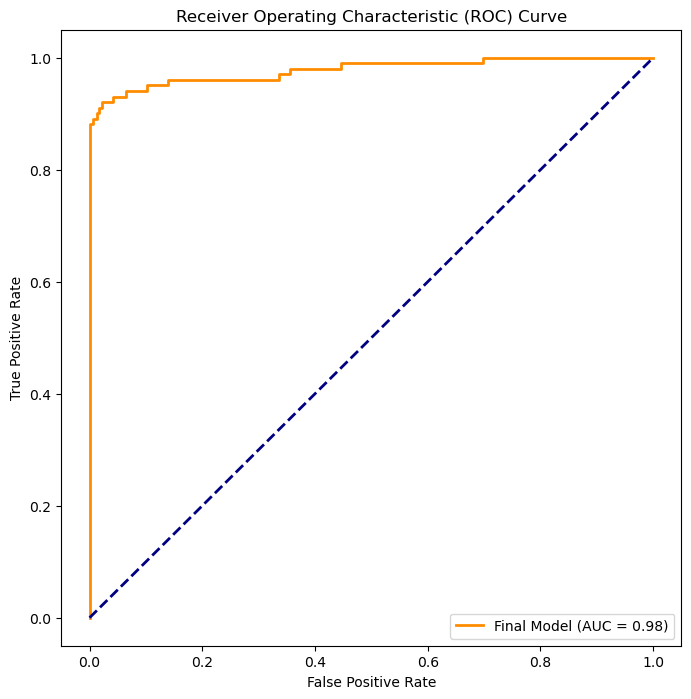

In [27]:
from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities for the final model
logreg_probs = logreg.predict_proba(x_test)[:, 1]

# Compute ROC curve and ROC area for the final model
fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_test, logreg_probs)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

# Plot ROC curve for the final model
plt.figure(figsize=(8, 8))
plt.plot(fpr_logreg, tpr_logreg, color='darkorange', lw=2, label=f'Final Model (AUC = {roc_auc_logreg:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

**2. Random Forest**

Intermediate Model (Random Forest): Move on to a more complex model like a random forest. Train the model and compare its performance with the baseline model. Explore different hyperparameters for the random forest, such as the number of trees, maximum depth, and minimum samples per leaf.

In [23]:
rafoc = RandomForestClassifier(random_state = 0)
rafoc.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [24]:
y_pred = rafoc.predict(x_test)

In [25]:
acc = accuracy_score(y_test, y_pred)
print(acc*100)

99.94908886626172


In [26]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[56854     7]
 [   22    79]]


In [27]:
precision_intermediate = precision_score(y_test, y_pred)
recall_intermediate = recall_score(y_test, y_pred)
f1_intermediate = f1_score(y_test,y_pred)

print("\nIntermediate Model Metrics:")
print(f"Precision: {precision_intermediate}")
print(f"Recall: {recall_intermediate}")
print(f"F1 Score: {f1_intermediate}")


Intermediate Model Metrics:
Precision: 0.9186046511627907
Recall: 0.7821782178217822
F1 Score: 0.8449197860962566


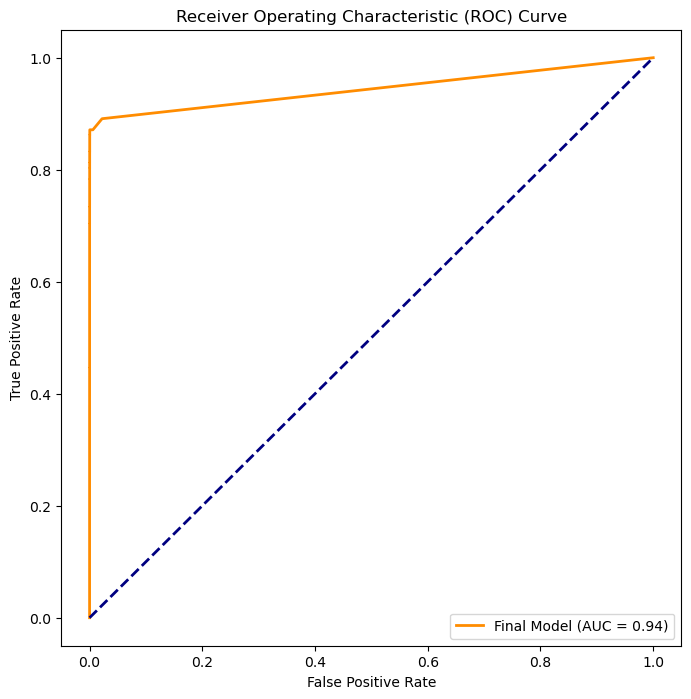

In [33]:
from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities for the final model
rafoc_probs = rafoc.predict_proba(x_test)[:, 1]

# Compute ROC curve and ROC area for the final model
fpr_intermediate, tpr_intermediate, thresholds_intermediate = roc_curve(y_test, rafoc_probs)
roc_auc_intermediate = auc(fpr_intermediate, tpr_intermediate)

# Plot ROC curve for the final model
plt.figure(figsize=(8, 8))
plt.plot(fpr_intermediate, tpr_intermediate, color='darkorange', lw=2, label=f'Final Model (AUC = {roc_auc_intermediate:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Hyper Parameter Tuning of the random forest model

In [28]:
# Hyperparameter Tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_leaf': [1, 2]
}

random_search = RandomizedSearchCV(estimator=rafoc, param_distributions=param_grid, n_iter=5, cv=3, scoring='accuracy', random_state=42, n_jobs=-1)
random_search.fit(x_train, y_train)

# Best hyperparameters from the grid search
best_params = random_search.best_params_

# Final Model with Tuned Hyperparameters
final_model = RandomForestClassifier(**best_params)
final_model.fit(x_train, y_train)
final_predictions = final_model.predict(x_test)

In [32]:
# Evaluation Metrics for Final Model
precision_final = precision_score(y_test, final_predictions)
recall_final = recall_score(y_test, final_predictions)
f1_final = f1_score(y_test, final_predictions)
acc_final = accuracy_score(y_test,final_predictions)

print("\nFinal Model Metrics:")
print(f"Precision: {precision_final}")
print(f"Recall: {recall_final}")
print(f"F1 Score: {f1_final}")
print(f"Accuracy: {acc_final}")


Final Model Metrics:
Precision: 0.9047619047619048
Recall: 0.7524752475247525
F1 Score: 0.8216216216216216
Accuracy: 0.999420666409185


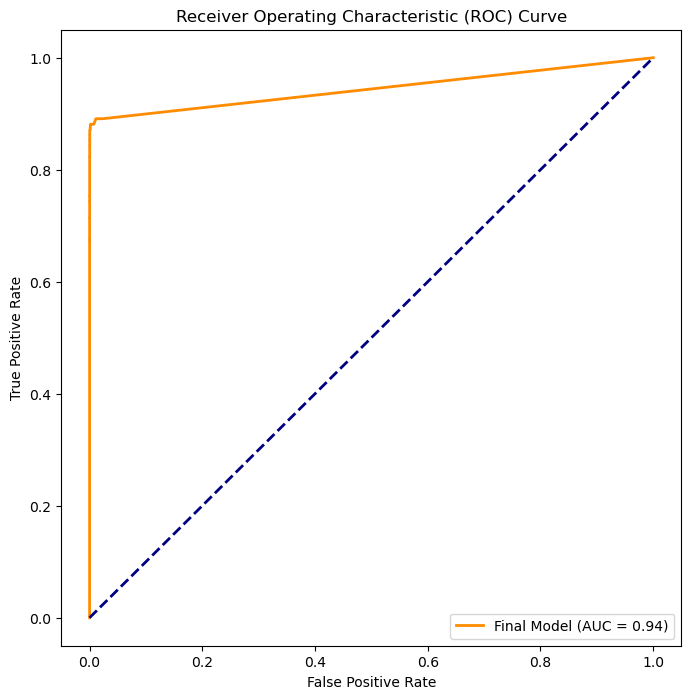

In [30]:
from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities for the final model
final_model_probs = final_model.predict_proba(x_test)[:, 1]

# Compute ROC curve and ROC area for the final model
fpr_final, tpr_final, thresholds_final = roc_curve(y_test, final_model_probs)
roc_auc_final = auc(fpr_final, tpr_final)

# Plot ROC curve for the final model
plt.figure(figsize=(8, 8))
plt.plot(fpr_final, tpr_final, color='darkorange', lw=2, label=f'Final Model (AUC = {roc_auc_final:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


An AUC of 0.94 is generally considered quite good.
Represents the model's ability to discriminate between positive and negative instances

# Model Results

### **Linear Regression Model**

##### Confusion Matrix:
[[56852     9]
 [   37    64]]
##### Accuracy:
 99.91924440855307
##### F1:
 0.7356321839080459
##### Precision:
 0.8767123287671232
##### Recall:
 0.6336633663366337

### **Random Forest**

##### Confusion Matrix:
 [[56854     7]
 [   22    79]]
##### Accuracy:
 99.94908886626172
##### F1:
 0.8449197860962566
##### Precision:
 0.9186046511627907
##### Recall:
 0.7821782178217822


### **Hyper Parameter Tuned Random Forest Model**

##### Confusion Matrix:
 
##### Accuracy:
 0.999420666409185
##### F1:
 0.8216216216216216
##### Precision:
 0.9047619047619048
##### Recall:
 0.7524752475247525
##### AUC:
 0.94

# RESULTS

**Using hyperparameter tuning, we positively impacted model performance. Suggesting that the tuning process and increased model complexity have resulted in a model that is better at distinguishing between legitimate and fraudulent transactions.**

**A higher F1 score indicates a better balance between precision and recall. This is desirable in fraud detection because it implies that the model is effective at both identifying fraudulent transactions and minimizing false positives. The complexity of the model, coupled with hyperparameter tuning, allows it to capture subtle patterns and relationships in the data, improving its discriminatory power.**